<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/banknote_authentication/blob/master/Banknote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANKNOTE AUTHENTICATION

**Importing Libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score,accuracy_score,confusion_matrix

**Importing Data**

In [3]:
url='https://raw.githubusercontent.com/AnirbanMukherjeeXD/banknote_authentication/master/dataset/data_banknote_authentication.csv'
dataframe=pd.read_csv(url)
dataset=dataframe.values
dataframe.head()

,variance_wti,skewness_wti,curtosis_wti,entropy_wti,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Visualizing Data**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


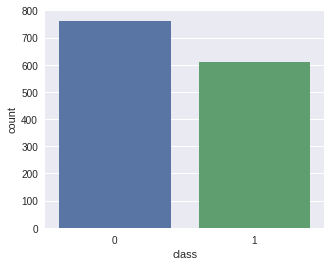

In [4]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x='class',data=dataframe)

In [5]:
dataframe.describe()

,variance_wti,skewness_wti,curtosis_wti,entropy_wti,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
print(dataframe.info())
dataframe.corr(method='spearman').style.background_gradient(cmap='coolwarm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance_wti    1372 non-null float64
skewness_wti    1372 non-null float64
curtosis_wti    1372 non-null float64
entropy_wti     1372 non-null float64
class           1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


,variance_wti,skewness_wti,curtosis_wti,entropy_wti,class
variance_wti,1,0.255126,-0.326704,0.241503,-0.735605
skewness_wti,0.255126,1,-0.729426,-0.57251,-0.429016
curtosis_wti,-0.326704,-0.729426,1,0.433299,0.0615996
entropy_wti,0.241503,-0.57251,0.433299,1,-0.0327505
class,-0.735605,-0.429016,0.0615996,-0.0327505,1


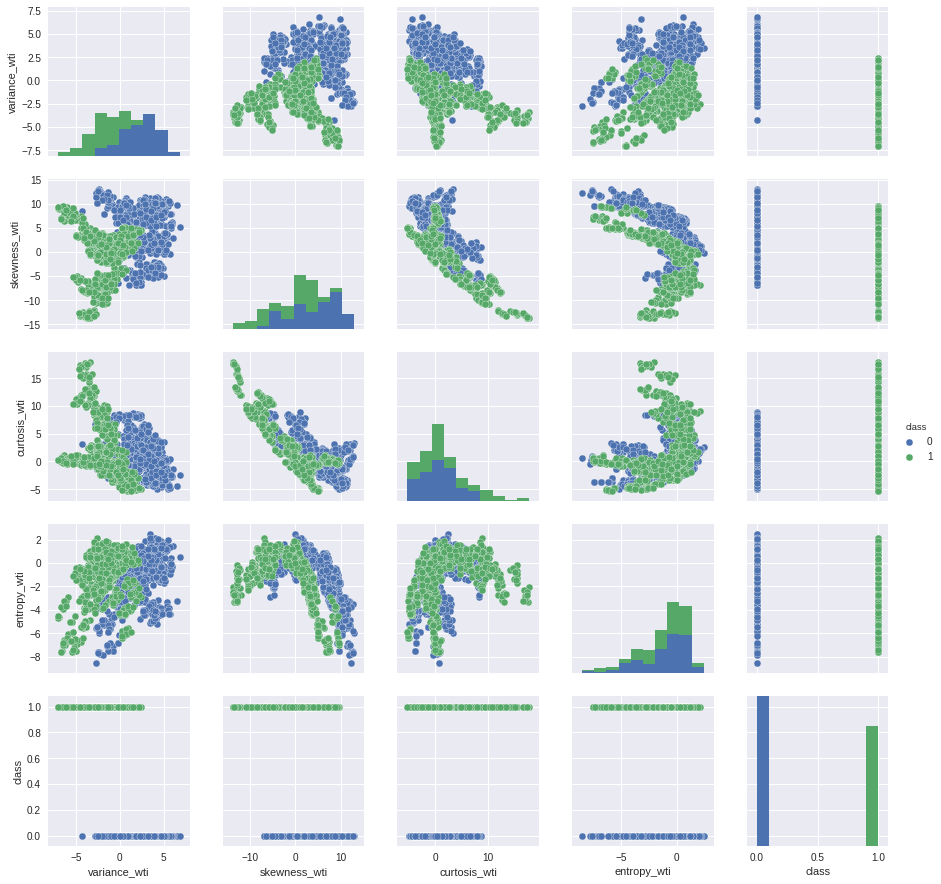

In [0]:
sns.pairplot(dataframe, hue="class")

**Data Preparation**

In [7]:
X=dataframe.iloc[:,0:4].values
Y=dataframe.iloc[:,4].values
print(X)
print(Y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


**Train-Test Split**

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

**Feature Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LOGISTIC REGRESSION**

In [35]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(solver='liblinear',random_state=42)
classifier.fit(X_train,Y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)*100
print("Accuracies:\n",accuracies)

Y_test_pred=classifier.predict(X_test)

cm=confusion_matrix(Y_test,Y_test_pred)
acc=accuracy_score(Y_test,Y_test_pred)
print("Mean: ",accuracies.mean())

Accuracies:
 [98.1981982  99.0990991  98.18181818 99.09090909 99.09090909 98.16513761
 97.24770642 99.08256881 97.24770642 98.16513761]
Mean:  98.35691905416675


**SVM LINEAR**

In [34]:
#SVM Linear

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)*100
print("Accuracies:\n",accuracies)

Y_test_pred=classifier.predict(X_test)

cm=confusion_matrix(Y_test,Y_test_pred)
acc=accuracy_score(Y_test,Y_test_pred)
print("Mean: ",accuracies.mean())

Accuracies:
 [99.0990991  99.0990991  99.09090909 99.09090909 99.09090909 98.16513761
 97.24770642 99.08256881 97.24770642 98.16513761]
Mean:  98.53791823516596


**SVM RBF**

In [33]:
#SVM RBF

from sklearn.svm import SVC

classifier=SVC(kernel='rbf',gamma='auto')
classifier.fit(X_train,Y_train)

accuracies=cross_val_score(estimator=classifier,X=X_test,y=Y_test,cv=10)*100
print("Accuracies:\n",accuracies)
print("Mean: ",accuracies.mean())

Accuracies:
 [100.          96.42857143 100.         100.         100.
 100.          96.42857143 100.         100.         100.        ]
Mean:  99.28571428571429


**RANDOM FOREST**

![alt text](https://raw.githubusercontent.com/AnirbanMukherjeeXD/banknote_authentication/master/images/forest.png)

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)
accuracies=cross_val_score(estimator=classifier,X=X_test,y=Y_test,cv=10)*100
 
print("Accuracies:\n",accuracies)
print("Mean: ",accuracies.mean())

Accuracies:
 [ 96.42857143 100.          89.28571429  96.42857143 100.
  96.42857143 100.          96.2962963  100.         100.        ]
Mean:  97.4867724867725


**MULTILAYER PERCEPTRON**

![alt text](https://raw.githubusercontent.com/AnirbanMukherjeeXD/banknote_authentication/master/images/network.png)

In [26]:
from sklearn.model_selection import StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3, seed=0))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=500, batch_size=50,  verbose=1, validation_split=0.2)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print(cvscores)

877/877 [==============================] - 0s 113us/step - loss: 0.0490 - acc: 0.9783 - val_loss: 0.0206 - val_acc: 0.9909
Epoch 124/500
877/877 [==============================] - 0s 111us/step - loss: 0.0448 - acc: 0.9818 - val_loss: 0.0211 - val_acc: 0.9909
Epoch 125/500
877/877 [==============================] - 0s 111us/step - loss: 0.0480 - acc: 0.9806 - val_loss: 0.0222 - val_acc: 0.9909
Epoch 126/500
877/877 [==============================] - 0s 112us/step - loss: 0.0426 - acc: 0.9806 - val_loss: 0.0225 - val_acc: 0.9909
Epoch 127/500
877/877 [==============================] - 0s 129us/step - loss: 0.0380 - acc: 0.9875 - val_loss: 0.0218 - val_acc: 0.9909
Epoch 128/500
877/877 [==============================] - 0s 107us/step - loss: 0.0453 - acc: 0.9818 - val_loss: 0.0216 - val_acc: 0.9909
Epoch 129/500
877/877 [==============================] - 0s 108us/step - loss: 0.0403 - acc: 0.9863 - val_loss: 0.0199 - val_acc: 0.9909
Epoch 130/500
877/877 [==============================] 

In [36]:
from statistics import mean
print("Accuracies: ",cvscores)
print("Mean: ",mean(cvscores))

Accuracies:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.27007299270073, 100.0]
Mean:  99.92700729927007
